In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
churn_data = pd.read_csv('/home/elliot/PycharmProjects/CSC 495 - Telecom Customer Churn/Datasets/telecom_churn_Processed.csv')

X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [4]:
testscores = []
trainscores = []

for i in range(1, 10):
    model = KNeighborsClassifier(i)
    model.fit(X_train, y_train)

    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)

    testscores.append(metrics.accuracy_score(y_test, test_pred))
    trainscores.append(metrics.accuracy_score(y_train, train_pred))

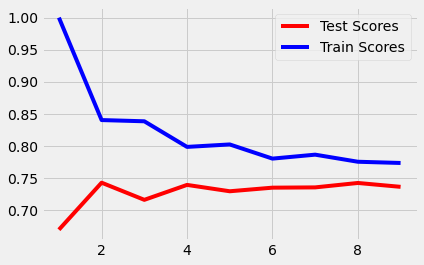

In [5]:
plt.plot(range(1, 10), testscores, label = 'Test Scores', color = 'red')

plt.plot(range(1, 10), trainscores, label = 'Train Scores', color = 'blue')

plt.legend();

In [6]:
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

In [7]:
knn_as = metrics.accuracy_score(y_test, y_pred_knn)
knn_as_train = metrics.accuracy_score(y_train, y_pred_knn_train)

In [8]:
print(f"Accuracy score for test data : {knn_as}")
print(f"Accuracy score for train data : {knn_as_train}")

Accuracy score for test data : 0.7423524342955623
Accuracy score for train data : 0.7754192315856506


In [9]:
metrics.confusion_matrix(y_test, y_pred_knn)

array([[1625,   86],
       [ 512,   98]])

In [10]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1711
           1       0.53      0.16      0.25       610

    accuracy                           0.74      2321
   macro avg       0.65      0.56      0.55      2321
weighted avg       0.70      0.74      0.69      2321



In [11]:
y_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)

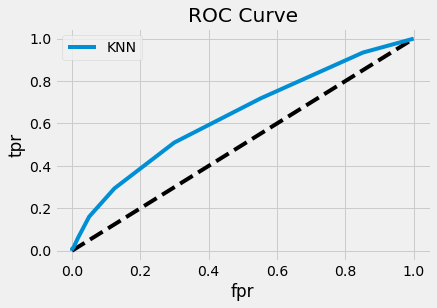

In [12]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [13]:
metrics.roc_auc_score(y_test, y_proba)

0.6376321008709316

In [14]:
metrics.confusion_matrix(y_pred_knn, y_test)


array([[1625,  512],
       [  86,   98]])